## Stock Market Trend Analysis and Forecasting

In [15]:
import pandas as pd
df= pd.read_csv("C:\\Users\\Rudraksh kaushik\\OneDrive\\Desktop\\DatasciencePRactice\\Datasets\\GS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-05-04,76.0000,77.250,70.0000,70.3750,53.576797,22320900
1,1999-05-05,69.8750,69.875,66.2500,69.1250,52.625153,7565700
2,1999-05-06,68.0000,69.375,67.0625,67.9375,51.721100,2905700
3,1999-05-07,67.9375,74.875,66.7500,74.1250,56.431648,4862300
4,1999-05-10,73.3750,73.500,70.2500,70.6875,53.814709,2589400


In [16]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5762 entries, 0 to 5761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5762 non-null   object 
 1   Open       5762 non-null   float64
 2   High       5762 non-null   float64
 3   Low        5762 non-null   float64
 4   Close      5762 non-null   float64
 5   Adj Close  5762 non-null   float64
 6   Volume     5762 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 315.2+ KB


In [18]:
df.shape

(5762, 7)

In [19]:
## Convvert date column in DateTime type
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df.set_index('Date', inplace=True)



In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-05-04,76.0000,77.250,70.0000,70.3750,53.576797,22320900
1999-05-05,69.8750,69.875,66.2500,69.1250,52.625153,7565700
1999-05-06,68.0000,69.375,67.0625,67.9375,51.721100,2905700
1999-05-07,67.9375,74.875,66.7500,74.1250,56.431648,4862300
1999-05-10,73.3750,73.500,70.2500,70.6875,53.814709,2589400


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5762 entries, 1999-05-04 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5762 non-null   float64
 1   High       5762 non-null   float64
 2   Low        5762 non-null   float64
 3   Close      5762 non-null   float64
 4   Adj Close  5762 non-null   float64
 5   Volume     5762 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 315.1 KB


In [22]:
# Check for duplicate dates
print(df.index.duplicated().sum())


0


In [23]:
ts_data = df[['Close']]
print(ts_data.head())


              Close
Date               
1999-05-04  70.3750
1999-05-05  69.1250
1999-05-06  67.9375
1999-05-07  74.1250
1999-05-10  70.6875


In [24]:
ts_data = ts_data.sort_index()
ts_data.head()


,Close
Date,
1999-05-04,70.3750
1999-05-05,69.1250
1999-05-06,67.9375
1999-05-07,74.1250
1999-05-10,70.6875


In [25]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5762 entries, 1999-05-04 to 2022-03-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5762 non-null   float64
dtypes: float64(1)
memory usage: 219.1 KB


In [26]:
ts_data.tail()

,Close
Date,
2022-03-18,345.380005
2022-03-21,339.000000
2022-03-22,343.010010
2022-03-23,335.609985
2022-03-24,336.230011


## Data Visulization

#### Moving MA50 and MA200

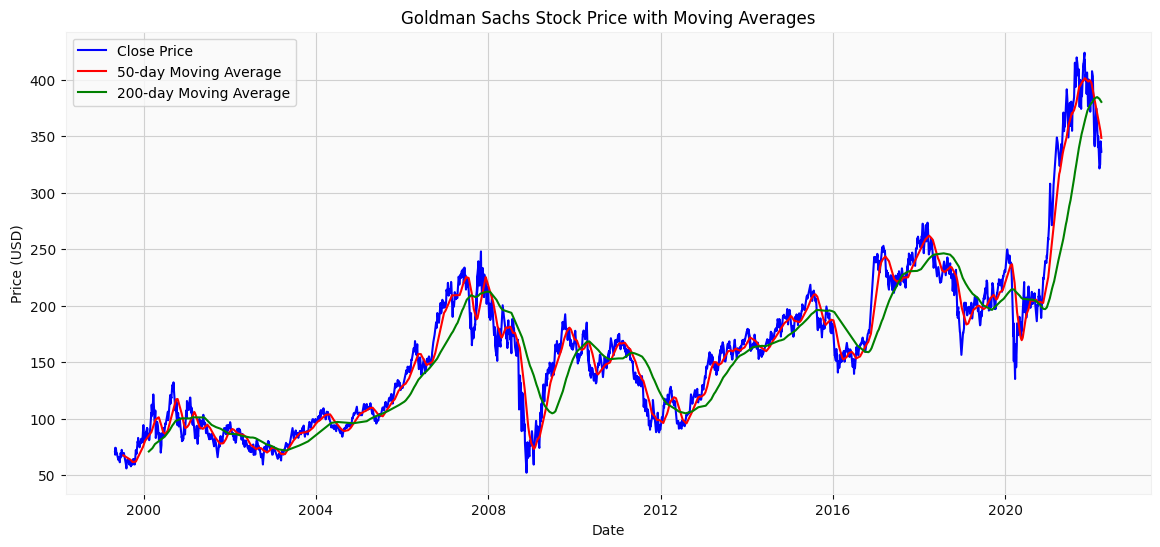

In [29]:
import matplotlib.pyplot as plt

# Plot Close price
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='blue')

# Add moving averages (trend indicators)
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.plot(df['MA50'], label='50-day Moving Average', color='red')
plt.plot(df['MA200'], label='200-day Moving Average', color='green')

plt.title("Goldman Sachs Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


#### Analysis of MA50 and MA200 from year 2000 to year 2025

* Golden Crosses (MA50 above MA200) = 2003, 2010, 2020 → signaled major bullish phases.

* Death Crosses (MA50 below MA200) = 2008, 2020 (short-lived), 2022 → signaled strong bearish phases.

* The most notable trends:

       * 2008 crash → strong bearish.

       * 2010–2020 → decade-long bullish period.

       * 2020–2021 → rapid rally post-COVID.

       * 2022–2025 → weak performance, long-term bearish tone.

## CandleStick Chart of Last 1 Year.

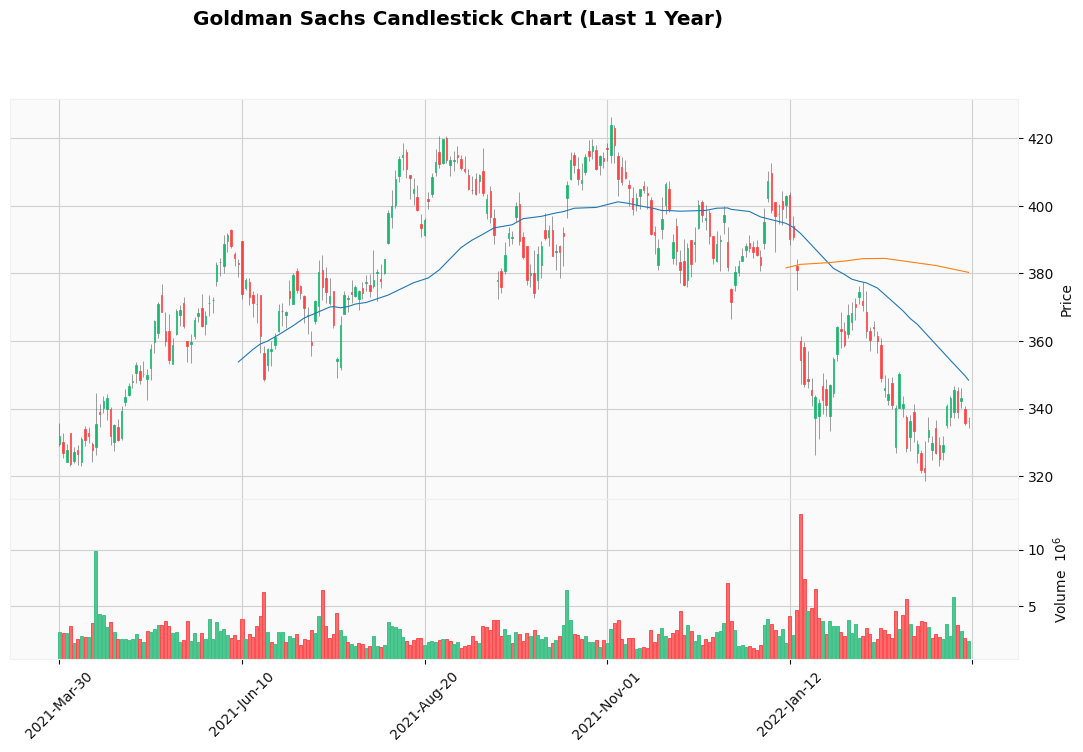

In [14]:
# Last 1 year (250 trading days approx.)
last_year = df.tail(250)

import mplfinance as mpf
mpf.plot(
    last_year,
    type='candle',
    volume=True,
    mav=(50, 200),
    title='Goldman Sachs Candlestick Chart (Last 1 Year)',
    style='yahoo',
    figsize=(14,8)
)


### Analysis Of Last 1Year CandleStick Chart.

* Uptrend Untile late 2021,Then Stock peaked and reversed into a downtrend in 2022
* High Volume during red candles = Strong Selling Pressure
* The moving average confirm the Shift from bullish to bearish sentiment.

In [ ]:
#

## Analysis Of Seasonal Decompose

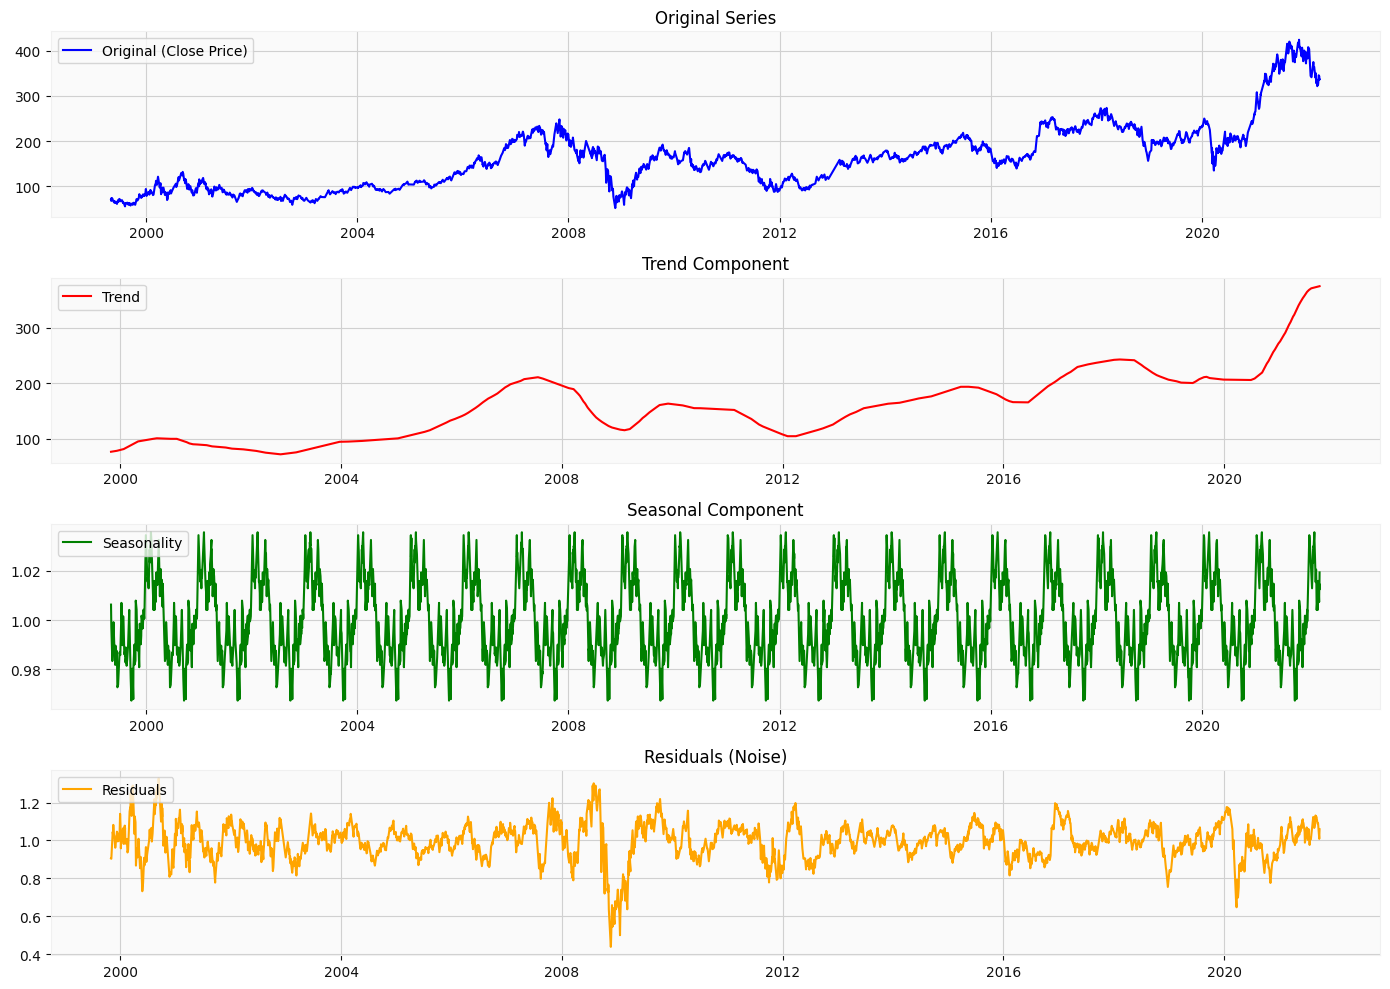

In [32]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose (multiplicative is common for stock prices, but you can try additive too)
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)  
# 252 trading days ≈ 1 year

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot all components
plt.figure(figsize=(14,10))

plt.subplot(411)
plt.plot(df['Close'], label="Original (Close Price)", color="blue")
plt.legend(loc="upper left")
plt.title("Original Series")

plt.subplot(412)
plt.plot(trend, label="Trend", color="red")
plt.legend(loc="upper left")
plt.title("Trend Component")

plt.subplot(413)
plt.plot(seasonal, label="Seasonality", color="green")
plt.legend(loc="upper left")
plt.title("Seasonal Component")

plt.subplot(414)
plt.plot(residual, label="Residuals", color="orange")
plt.legend(loc="upper left")
plt.title("Residuals (Noise)")

plt.tight_layout()
plt.show()


### Analysis of Seasonal Decompose

##### 1) Original(Close Price)
    * The stock shows a general upward growth from 2000 to 2025, meaning long-term investors gained.

    * However, there are sharp declines during crises (2008 financial crisis, 2020 COVID crash).

##### 2) Trend Component
    * A clear long-term uptrend exists, especially after 2010, showing company growth and market recovery.
     
    * Temporary downtrends align with economic downturns (2008, 2020), highlighting sensitivity to global    events.    

##### 3) Seasonal Component

    * The stock exhibits recurring seasonal patterns, likely linked to yearly financial cycles or economic reporting.

    * Seasonal effects are relatively smaller compared to the trend, meaning long-term growth dominates short-term cycles.   

##### 4) Residuals
    *Large spikes in residuals indicate unexpected shocks (e.g., 2008 crash, COVID-2020).

    *For most periods, residuals remain close to zero, meaning the trend + seasonality explain stock movements fairly well.     

### Analysis of Volume Over Year

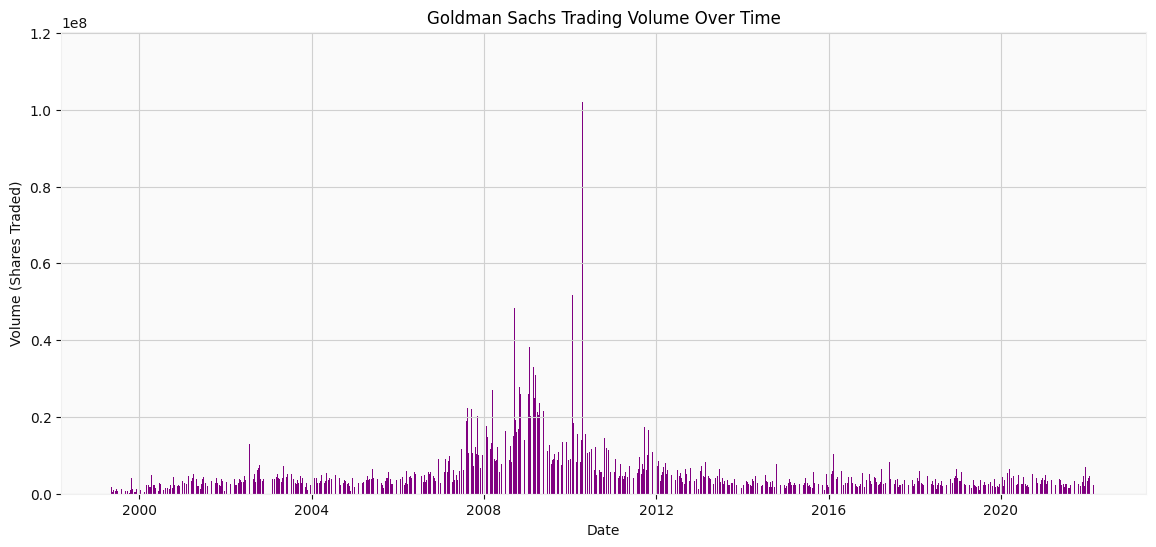

In [33]:
import matplotlib.pyplot as plt

# Plot volume over time
plt.figure(figsize=(14,6))
plt.bar(df.index, df['Volume'], color='purple')

plt.title("Goldman Sachs Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume (Shares Traded)")
plt.show()



##### 2007–2009 Spike →

    #### Trading volume shot up massively during the 2008 financial crisis.

    #### Investors were panic-selling or heavily trading Goldman Sachs due to uncertainty.

#### Post-2010 Decline in Volume →

    ####After the crisis, trading activity reduced significantly.

    ####Market stabilized, and fewer panic-driven trades happened.

##### Normal Activity →

    ####Outside crisis periods, the volume stays relatively low and stable, showing routine trading.